In [1]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api = wandb.Api(timeout=600)
entity, project = 'autoconvnext', 'rainbow'
runs = api.runs(entity + '/' + project)

In [3]:
summary_list, config_list, name_list = [], [], []
network_archs = []
resolution = []
grad_clip = []
spectral_norm = []
history = []
run_ids = []
env_name = []
for run in runs:
    if run.config['resolution'] is None:
        continue
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k,v in run.config.items() if not k.startswith('_')})
    network_archs.append(run.config['network_arch'])
    resolution.append(run.config['resolution'][0])
    grad_clip.append(run.config['max_grad_norm'])
    spectral_norm.append(run.config['spectral_norm'])
    name_list.append(run.name)
    run_ids.append(run.id)
    env_name.append(run.config['env_name'])

In [4]:
cmap = sns.color_palette("husl", 15)

In [5]:
runs_df = pd.DataFrame({"summary":summary_list, "network_arch": network_archs, "resolution": resolution, 
                        "grad_clip": grad_clip, "spectral_norm":spectral_norm, "name": name_list, "run_id": run_ids, 'env_name': env_name})

In [6]:
runs_df = runs_df[runs_df['env_name'] == 'gym:Qbert']

In [7]:
baseline = runs_df[runs_df['network_arch'] == 'impala_large:2']
# baseline = runs_df[runs_df['resolution'] == 84]
# baseline = runs_df[runs_df['grad_clip'] == 10]
# baseline = runs_df[runs_df['spectral_norm'] == True]

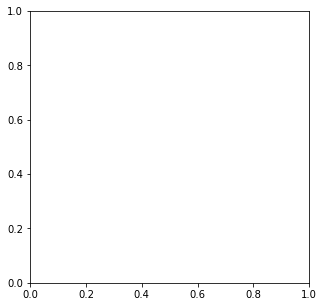

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

In [9]:
history_frames = []
history_running_avg_reward = []
for run_id in baseline['run_id']:

    run = api.run(entity + '/' + project + '/' + run_id)
    history = run.history()
    try:
        if history['x/game_frame'].to_list()[-1] < 800000:
            continue 
        history_frames += history['x/game_frame'].to_list()
        print(len(history_frames))
        history_running_avg_reward += history['running_avg_return'].to_list()
        print(len(history_running_avg_reward))
        print(run.name)
    except:
        print("No history for run_id: ", run_id, run.name)
        continue
# print(history_frames)
# print(history_running_avg_reward)
sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                label=f'ImaplaLarge:2 (Baseline)', ax=ax)

No history for run_id:  29y5qdvt good-universe-236
No history for run_id:  1tkrij3q wise-aardvark-227
No history for run_id:  2hm07n0m pleasant-universe-221
No history for run_id:  1ncbd6gy silver-disco-220
No history for run_id:  1m1f1zos exalted-frost-219
No history for run_id:  foffg9d5 divine-aardvark-218
No history for run_id:  3ty0en2n giddy-snowflake-217
No history for run_id:  106ngao7 restful-leaf-216
No history for run_id:  37ysi99n pious-frost-215
526
526
chocolate-paper-187
1041
1041
revived-snowflake-186
1563
1563
devoted-hill-185
No history for run_id:  3mzieinq vocal-plant-113
No history for run_id:  34h8zwsk soft-bush-112
No history for run_id:  211xa2o7 revived-wave-111
No history for run_id:  39e1m0qh glorious-forest-96
No history for run_id:  31ig10uw playful-feather-95
No history for run_id:  17ss4qyx icy-oath-94
No history for run_id:  1bdvfh12 prime-deluge-93
No history for run_id:  2fitk32w visionary-voice-92
No history for run_id:  2mwkivbw neat-dream-90
No hist

<AxesSubplot:>

In [10]:
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
arch_group_df = runs_df[runs_df['network_arch'] == 'convnext_atto']
for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
    print(resolution_name)
    # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

    for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
        print(grad_clip_name)
        # print(grad_clip_group_df[['spectral_norm', 'name']])

        for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
            print(spectral_norm_name)
            # print(spectral_norm_group_df[['name']])
            
            history_frames = []
            history_running_avg_reward = []
            for run_id in spectral_norm_group_df['run_id']:

                run = api.run(entity + '/' + project + '/' + run_id)
                history = run.history()
                try:
                    if history['x/game_frame'].to_list()[-1] < 500000:
                        continue 
                    history_frames += history['x/game_frame'].to_list()
                    print(len(history_frames))
                    history_running_avg_reward += history['running_avg_return'].to_list()
                    print(len(history_running_avg_reward))
                    print(run.name)
                except:
                    print("No history for run_id: ", run_id, run.name)
                    continue
            # print(history_frames)
            # print(history_running_avg_reward)
            sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                            label=f'Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)
            i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)


140
0.1
none
526
526
dauntless-dragon-249
1037
1037
usual-breeze-248
1503
1503
golden-firefly-247
2007
2007
elated-silence-246
2477
2477
feasible-leaf-245
2986
2986
dulcet-cloud-244
3496
3496
revived-aardvark-243
4054
4054
wild-thunder-242
4543
4543
dutiful-puddle-240
5010
5010
restful-pond-239
5487
5487
unique-leaf-238
5966
5966
eager-gorge-168
6480
6480
revived-universe-166
6972
6972
denim-glade-169
10.0
all
495
495
comfy-butterfly-172
975
975
soft-flower-171
1470
1470
crimson-disco-170
1980
1980
summer-frost-158
2477
2477
fresh-field-157
2938
2938
splendid-breeze-156
none
522
522
driven-serenity-149
1029
1029
noble-voice-148
1511
1511
bumbling-universe-147
2035
2035
worldly-fire-139
2535
2535
zany-night-140
3060
3060
devout-dew-138
144
0.1
none
478
478
copper-fire-167
973
973
avid-valley-165
1446
1446
sunny-leaf-164
1944
1944
eager-water-162
10.0
all
474
474
blooming-plasma-175
949
949
desert-surf-174
1438
1438
glamorous-blaze-173
1924
1924
morning-paper-155
2452
2452
jolly-leaf-154

In [20]:
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp1.png', dpi=600, bbox_inches='tight')
fig.savefig('comp1.pdf', bbox_inches='tight')
fig.show()

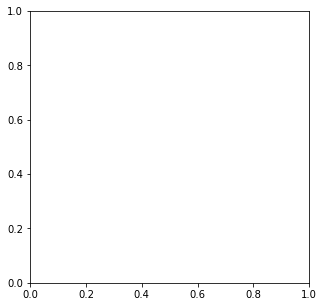

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

In [22]:
history_frames = []
history_running_avg_reward = []
for run_id in baseline['run_id']:

    run = api.run(entity + '/' + project + '/' + run_id)
    history = run.history()
    try:
        if history['x/game_frame'].to_list()[-1] < 800000:
            continue 
        history_frames += history['x/game_frame'].to_list()
        print(len(history_frames))
        history_running_avg_reward += history['running_avg_return'].to_list()
        print(len(history_running_avg_reward))
        print(run.name)
    except:
        print("No history for run_id: ", run_id, run.name)
        continue
# print(history_frames)
# print(history_running_avg_reward)
sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                label=f'ImaplaLarge:2 (Baseline)', ax=ax)

No history for run_id:  29y5qdvt good-universe-236
No history for run_id:  1tkrij3q wise-aardvark-227
No history for run_id:  2hm07n0m pleasant-universe-221
No history for run_id:  1ncbd6gy silver-disco-220
No history for run_id:  1m1f1zos exalted-frost-219
No history for run_id:  foffg9d5 divine-aardvark-218
No history for run_id:  3ty0en2n giddy-snowflake-217
No history for run_id:  106ngao7 restful-leaf-216
No history for run_id:  37ysi99n pious-frost-215
502
502
chocolate-paper-187
1013
1013
revived-snowflake-186
1489
1489
devoted-hill-185
No history for run_id:  3mzieinq vocal-plant-113
No history for run_id:  34h8zwsk soft-bush-112
No history for run_id:  211xa2o7 revived-wave-111
No history for run_id:  39e1m0qh glorious-forest-96
No history for run_id:  31ig10uw playful-feather-95
No history for run_id:  17ss4qyx icy-oath-94
No history for run_id:  1bdvfh12 prime-deluge-93
No history for run_id:  2fitk32w visionary-voice-92
No history for run_id:  2mwkivbw neat-dream-90
No hist

<AxesSubplot:>

In [23]:
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
arch_group_df = runs_df[(runs_df['network_arch'] == 'convnext_impala:2') | (runs_df['network_arch'] == 'convnext_impala:1')]
for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
    print(resolution_name)
    # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

    for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
        print(grad_clip_name)
        # print(grad_clip_group_df[['spectral_norm', 'name']])

        for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
            print(spectral_norm_name)
            # print(spectral_norm_group_df[['name']])
            
            history_frames = []
            history_running_avg_reward = []
            for run_id in spectral_norm_group_df['run_id']:

                run = api.run(entity + '/' + project + '/' + run_id)
                history = run.history()
                try:
                    if history['x/game_frame'].to_list()[-1] < 500000:
                        continue 
                    history_frames += history['x/game_frame'].to_list()
                    print(len(history_frames))
                    history_running_avg_reward += history['running_avg_return'].to_list()
                    print(len(history_running_avg_reward))
                    print(run.name)
                except:
                    print("No history for run_id: ", run_id, run.name)
                    continue
            # print(history_frames)
            # print(history_running_avg_reward)
            sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                            label=f'Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)
            i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)


84
10.0
none
500
500
trim-mountain-201
1022
1022
scarlet-wind-202
1518
1518
valiant-bee-200
No history for run_id:  364l844e honest-flower-199
No history for run_id:  3g0g2ryh ethereal-sound-198
No history for run_id:  3bn0zicl denim-waterfall-197
2004
2004
warm-eon-196
2542
2542
expert-bee-194
3047
3047
stilted-wildflower-195
No history for run_id:  3op334g5 denim-haze-192
No history for run_id:  215tfjrb fast-armadillo-193
No history for run_id:  16f9336d snowy-deluge-191
No history for run_id:  3j3rwo4r revived-wildflower-190
No history for run_id:  2tu3kzpp dashing-frost-188
No history for run_id:  151u59t3 cosmic-eon-188


In [24]:
runs_df['network_arch'].unique()

array(['impalanextv8_large:2', 'impalanextv9_large:2',
       'impalanextv3_large:2', 'impalanextv6_large:2',
       'impalanextv4_large:2', 'impalanextv5_large:2',
       'impalanextv2_large:2', 'convnext_atto', 'impala_large:2',
       'convnext_impala:4', 'convnext_impala:2', 'convnext_impala:1',
       'impalanext_large:1', 'impalanext_large:2', 'nature'], dtype=object)

In [25]:
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp2.png', dpi=600, bbox_inches='tight')
fig.savefig('comp2.pdf', bbox_inches='tight')
fig.show()